## EXPLORACION

- Extracción de datos: cargaremos el conjunto de datos y le echaremos un primer vistazo.
- Limpieza: completaremos los valores faltantes.
- Graficación: crearemos algunos gráficos interesantes que (con suerte) revelarán correlaciones e ideas ocultas en los datos.
- Suposiciones: formularemos hipótesis a partir de los gráficos.

In [2]:
#referencia https://www.ahmedbesbes.com/blog/kaggle-titanic-competition
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

- Se dispone de dos conjuntos de datos: un conjunto de entrenamiento y un conjunto de prueba. 

In [3]:
#cargar el training set
data = pd.read_csv('train.csv')
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.400,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.000,NaN,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.500,NaN,S
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.775,NaN,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.050,NaN,S


In [6]:
#describir los datos - faltan registros
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Calcular la suma de NaN por columna
nan_sum = data.isna().sum()
nan_sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The count variable shows that 177 values are missing in the Age column.
- Una solución es completar los valores nulos con la mediana de la edad. También podríamos imputar con la edad media, pero la mediana es más robusta ante valores atípicos.

In [8]:
#llenar el resto con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Sex'>

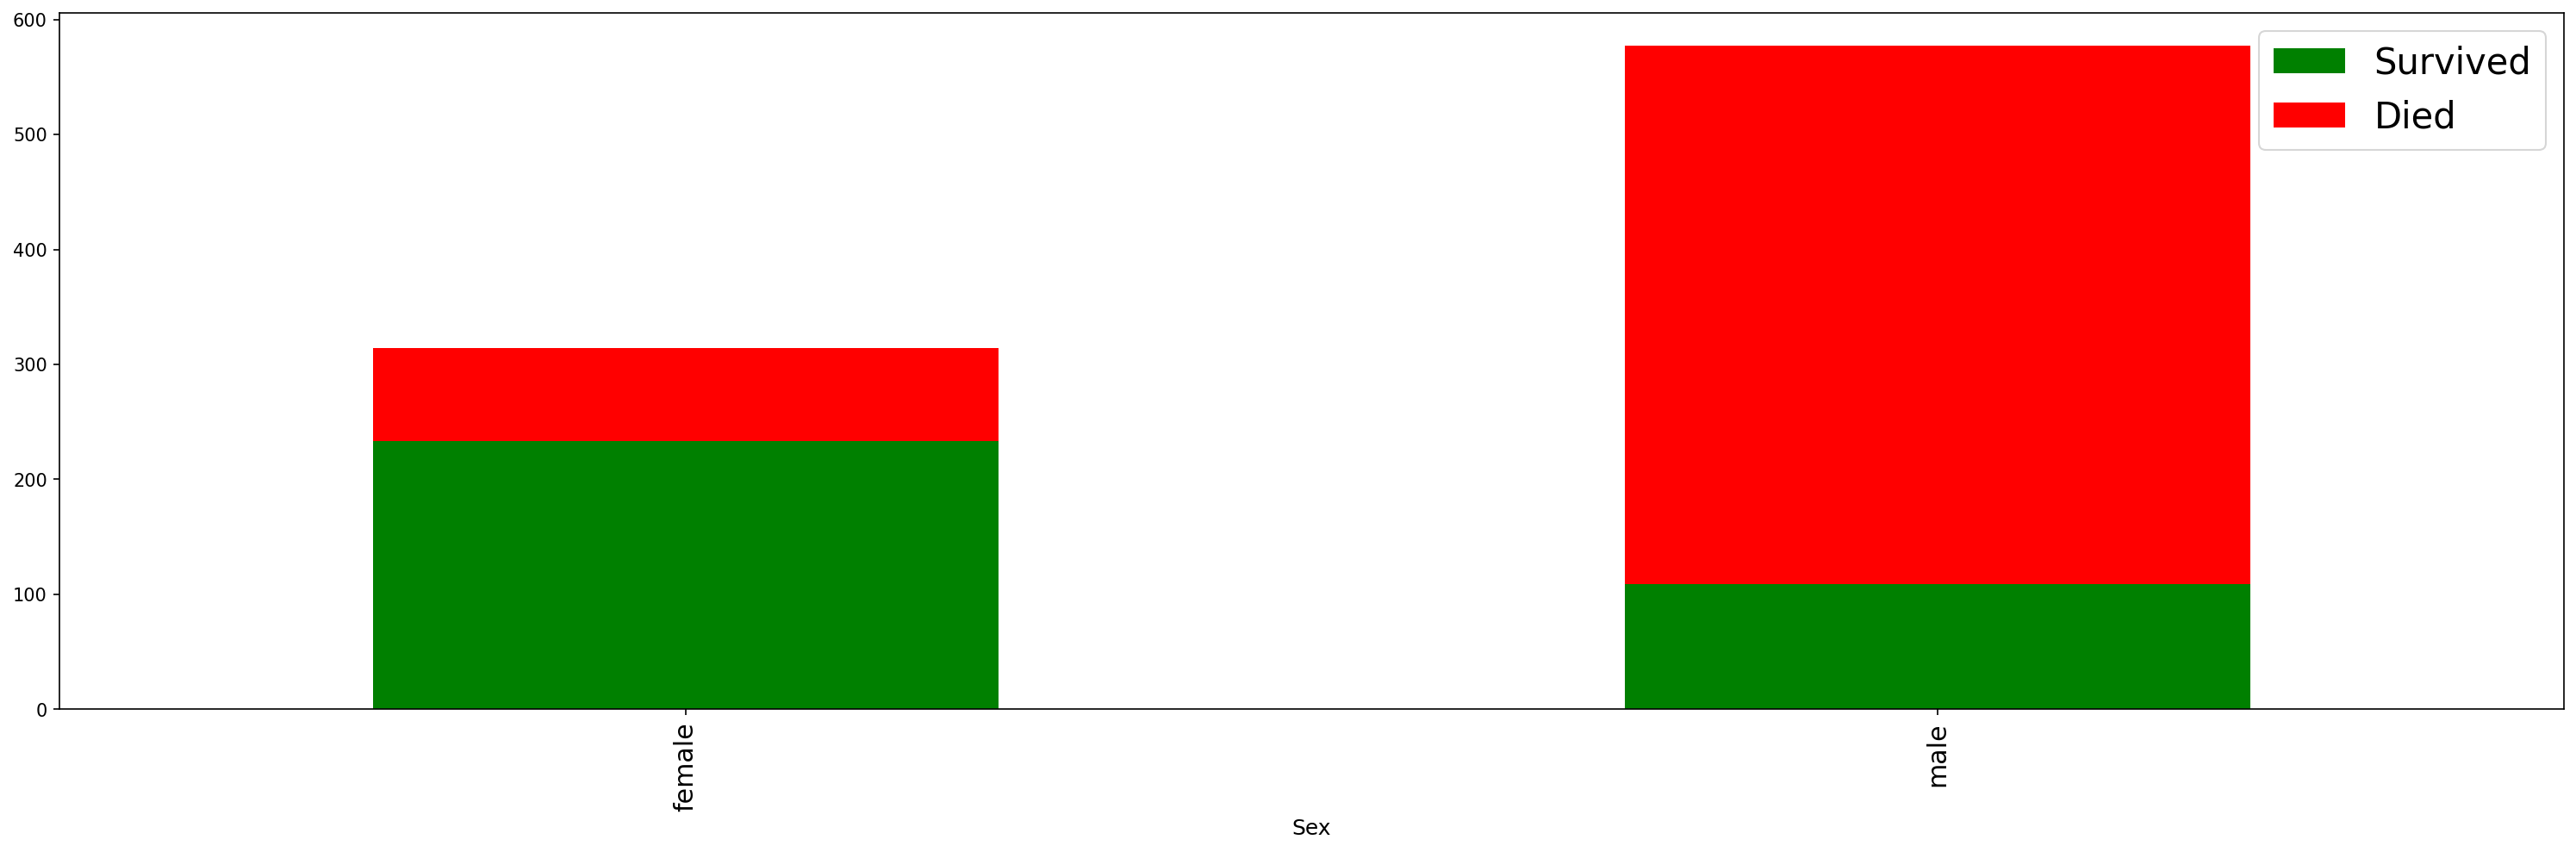

In [9]:
# Visualización - supervivencia por género
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['g', 'r'])

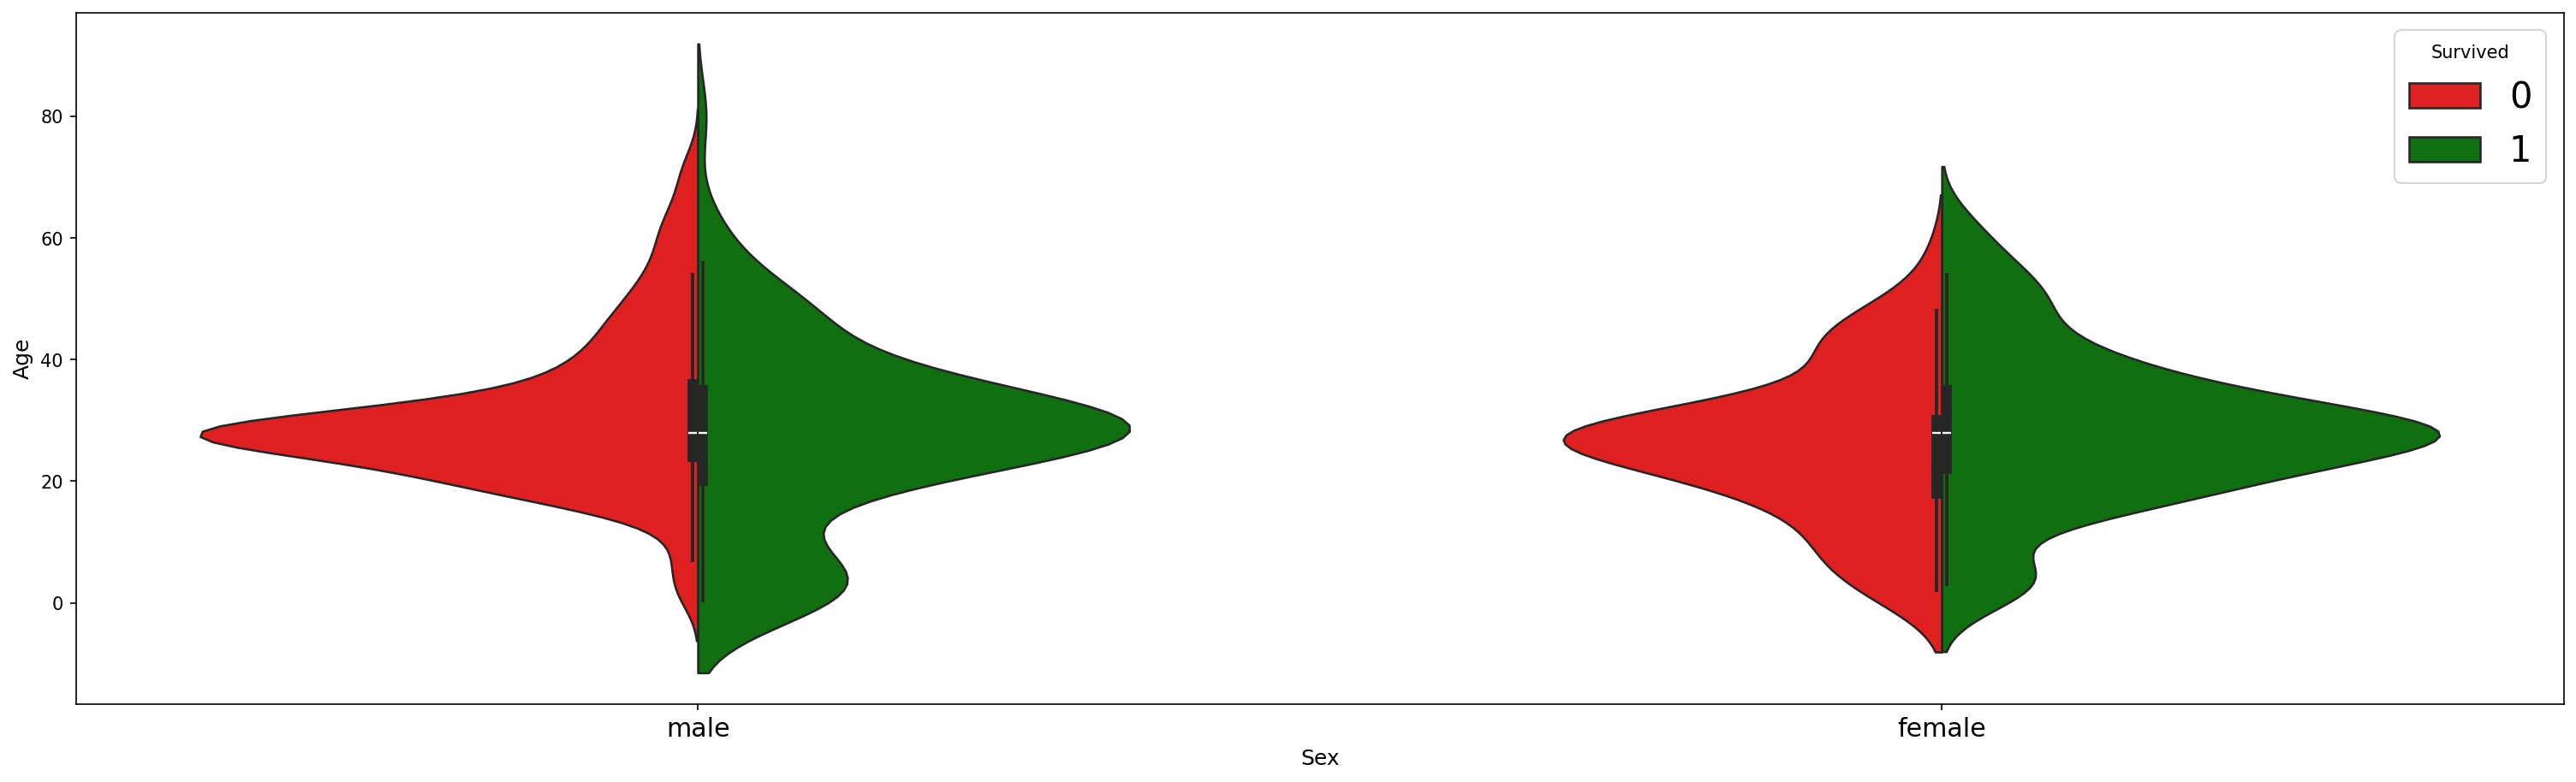

In [10]:
#Correlación - supervivencia por edad
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

Como observamos en el gráfico anterior y validamos con la información siguiente:

- Las mujeres tienen una tasa de supervivencia mayor que los hombres, como se muestra en el histograma verde más grande para las mujeres.

Ahora, notamos que:

- La edad condiciona la supervivencia de los pasajeros masculinos:
  - Los hombres más jóvenes tienden a sobrevivir.
  - Un gran número de pasajeros entre 20 y 40 años sucumben.
  
- La edad no parece tener un impacto directo en la supervivencia de las mujeres.

Estos gráficos de violín confirman una antigua norma de conducta que los marineros y capitanes siguen en situaciones amenazadoras: "¡Mujeres y niños primero!".

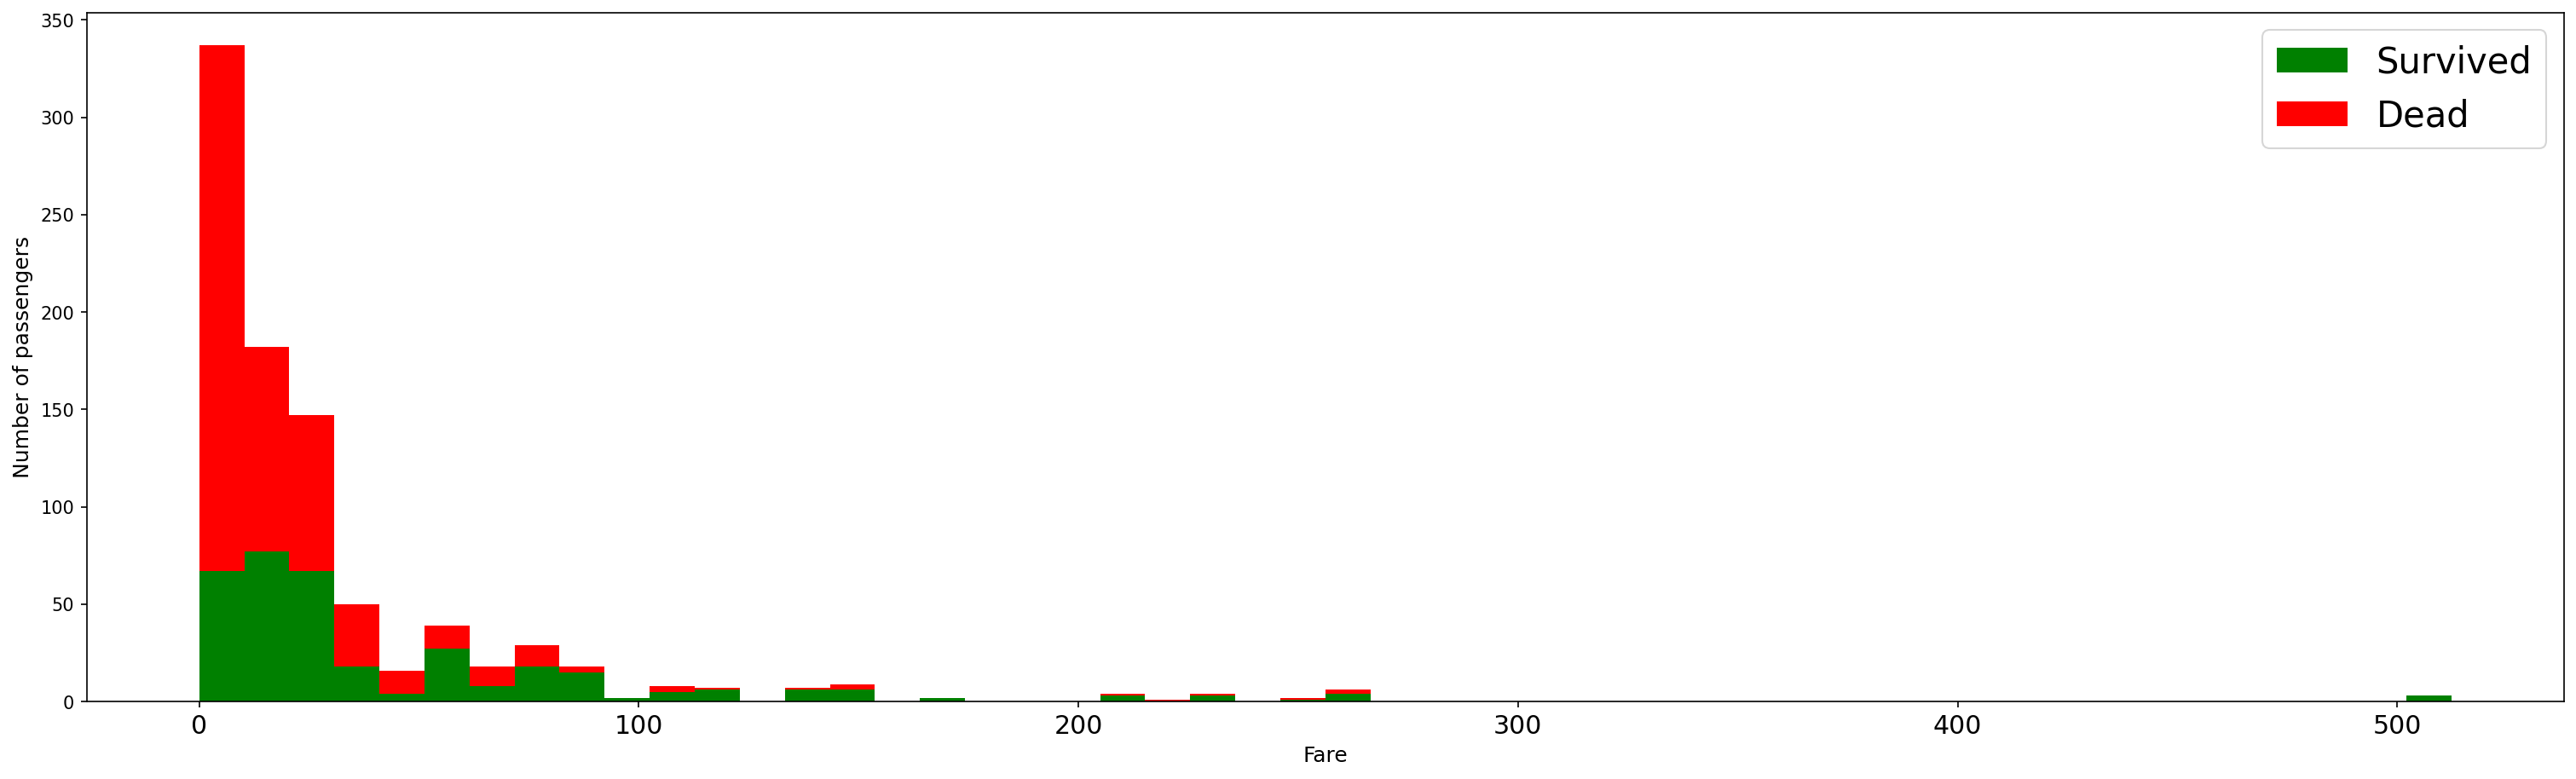

In [10]:
#encontrar relación entre precio y supervivencia
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

- Los pasajeros con tarifas de boletos más baratas tienen más probabilidades de fallecer. En otras palabras, los pasajeros con boletos más caros, y por lo tanto, un estatus social más importante, parecen ser rescatados primero.


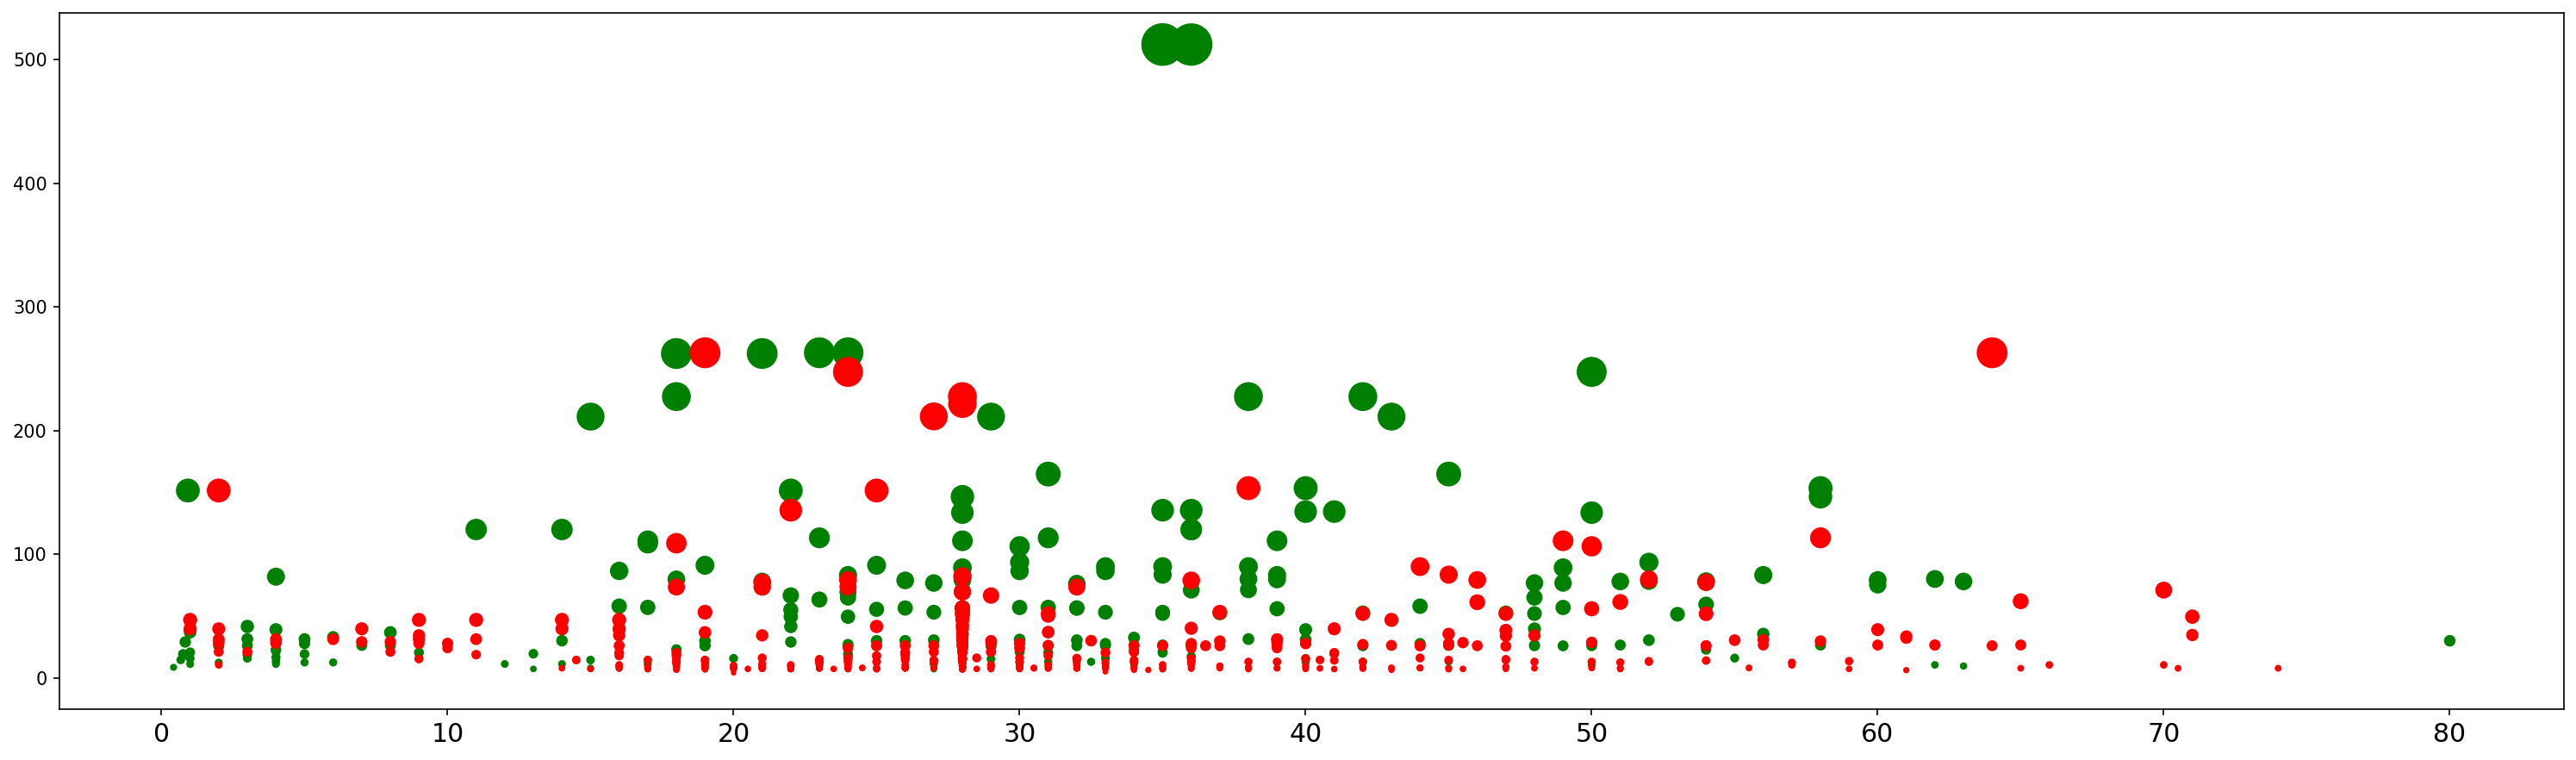

In [13]:
#combinar edad y precio 
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

In [21]:
# Convierte la columna 'Fare' a numérica y verifica si hay algún valor no numérico
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')

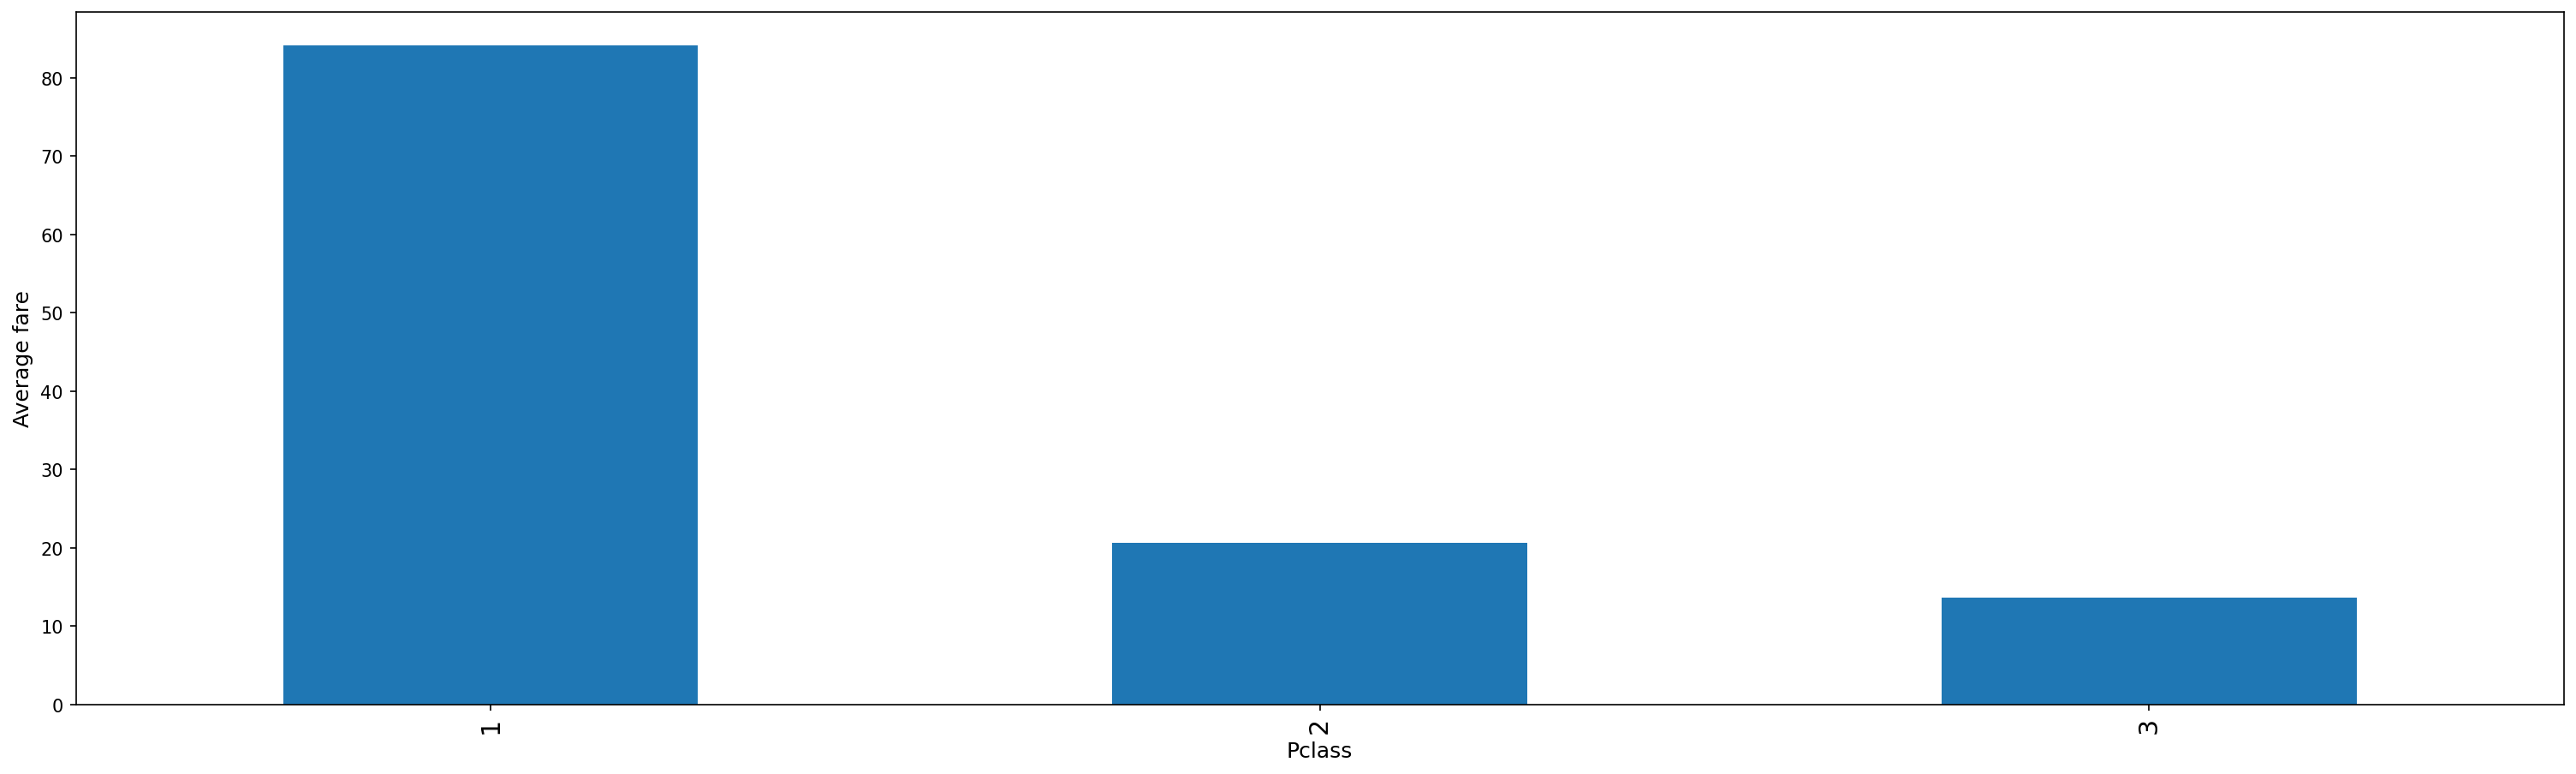

In [25]:
# Crea el gráfico después de limpiar los datos
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass')['Fare'].mean().plot(kind='bar', figsize=(25, 7), ax = ax);

<Axes: xlabel='Embarked', ylabel='Fare'>

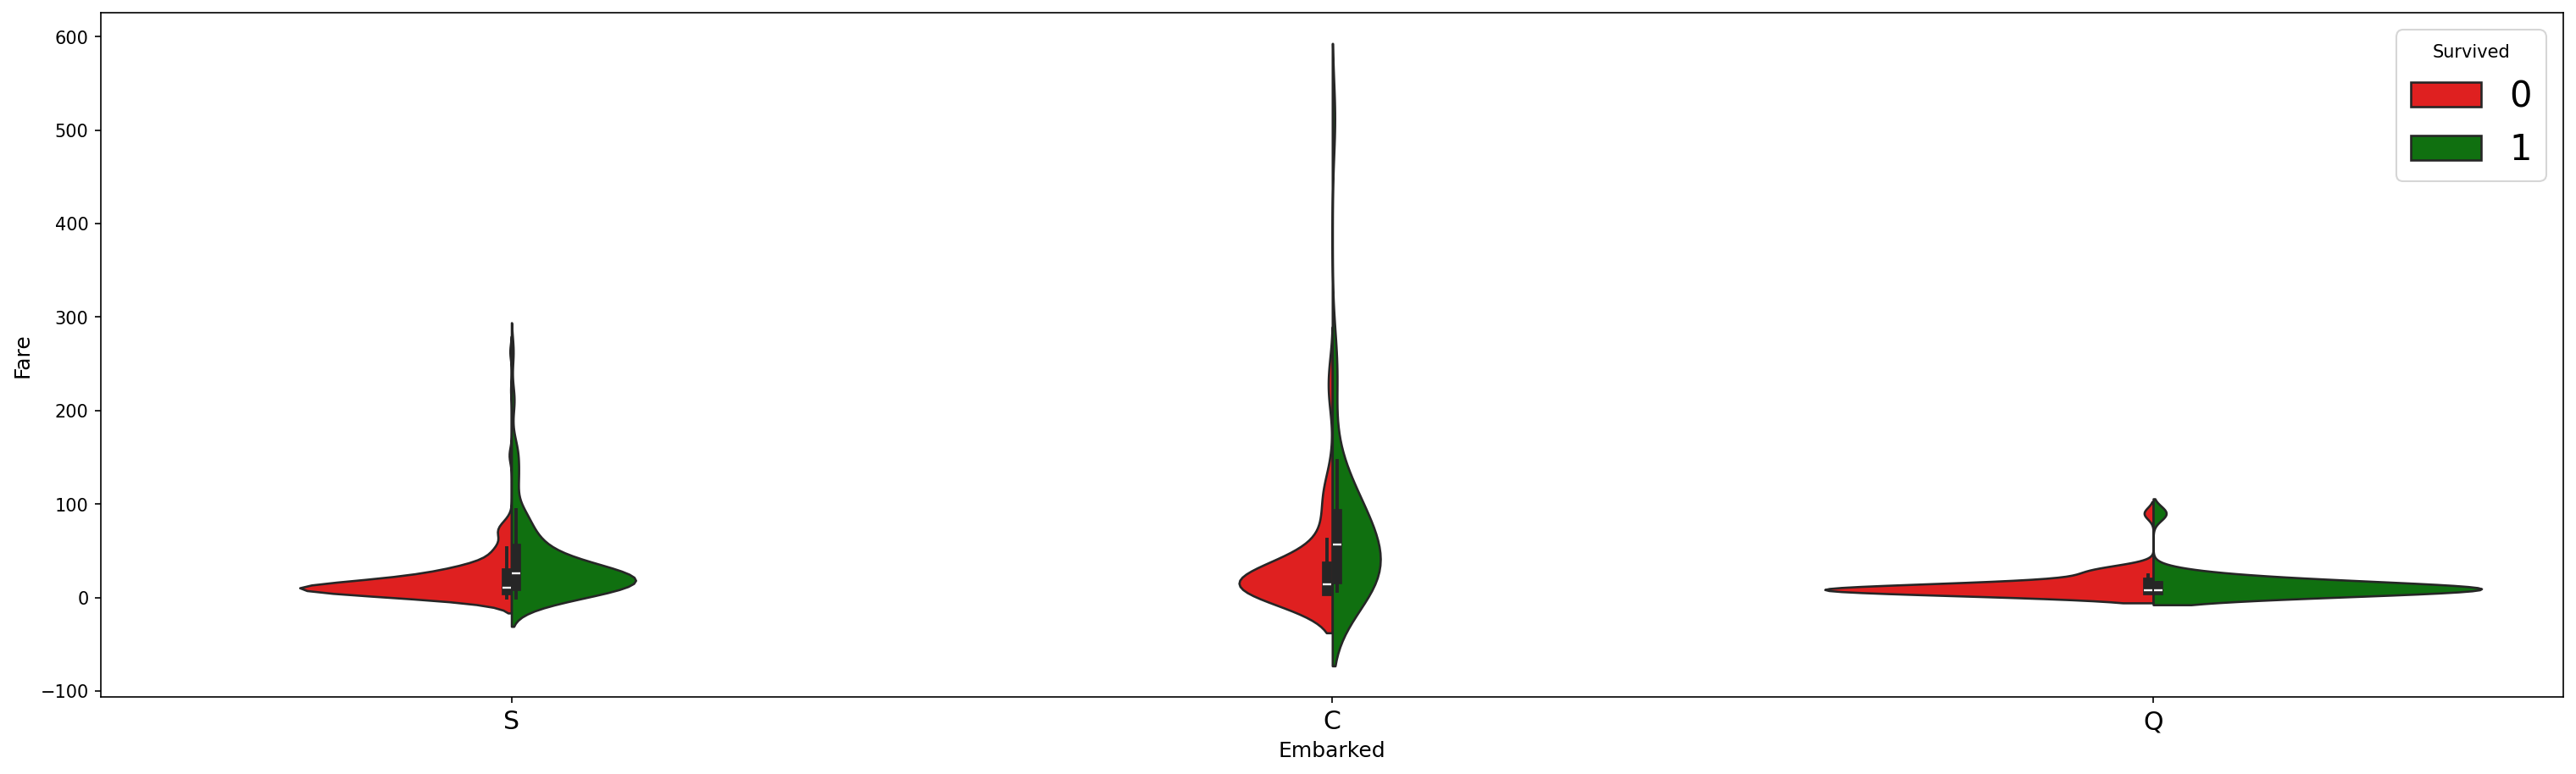

In [26]:
#relacion precio y clase
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"})

- Parece que la embarcación C tiene un rango más amplio de tarifas de boletos y, por lo tanto, los pasajeros que pagan las tarifas más altas son aquellos que sobreviven.
- También observamos que esto sucede en la embarcación S y en menor medida en la embarcación Q.

In [27]:
#PRACTICA 1 - hacer un análisis similar con otra categoría ej. lugar de embarque. ¿Qué se puede concluir?

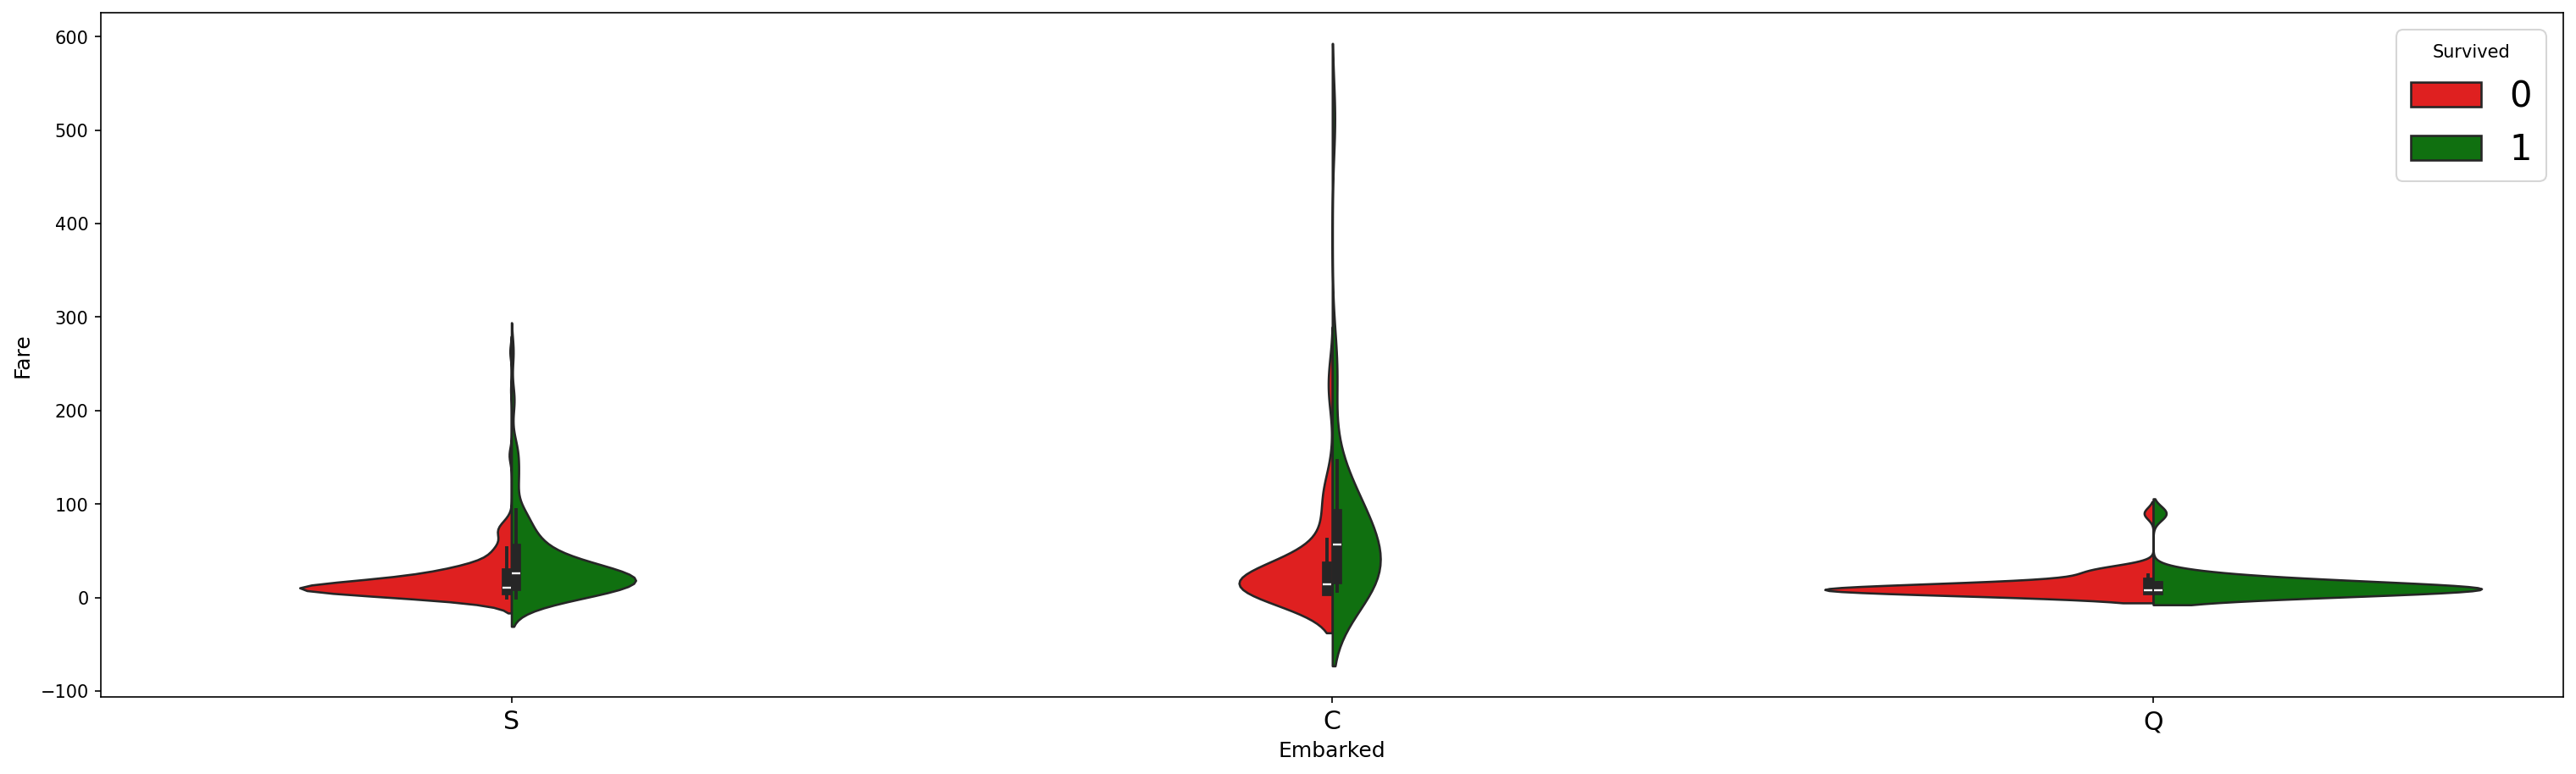

In [28]:
#SOLUCION 1
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

En general, este gráfico sugiere que la tarifa pagada por el boleto podría estar relacionada con la probabilidad de supervivencia, con aquellos que pagaron tarifas más altas mostrando una tendencia a tener una mayor tasa de supervivencia. Sin embargo, esto no implica necesariamente una relación causal y podría haber otros factores involucrados. La interpretación definitiva dependerá del análisis más detallado de los datos y del contexto del problema.

## FEATURE ENGINEERING

In [15]:
#helper
def status(feature):
    print('Processing', feature, ': ok')

In [16]:
#datos combinados de train y set para referencia
def get_combined_data():
    train = pd.read_csv('train.csv') 
    test = pd.read_csv('test.csv')
    # eliminar survived de train 
    targets = train.Survived
    train.drop(['Survived'], axis=1, inplace=True)
    # merging de datos
    # eliminar PassengerId
    combined = pd.concat([train, test], ignore_index=True) 
    return combined

In [17]:
combined = get_combined_data()
combined.shape

(1309, 11)

In [18]:
#extraer los titulos de los nombres
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # extraer título de cada nombre
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    # mapear cada titulo
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [19]:
combined = get_titles()
combined.head()

Processing Title : ok


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
#todo fue procesado?
combined[combined['Title'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [21]:
#ingeniería de la edad
print(combined.iloc[:891].Age.isnull().sum()) #TRAIN
print(combined.iloc[891:].Age.isnull().sum()) #TEST

177
86


In [22]:
# Convertir 'Title' a tipo categórico
combined['Title'] = combined['Title'].astype('category')

In [23]:
# Crear grupos y calcular la mediana solo para la columna 'Age'
grouped_train = combined.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train['Age'].median().reset_index()
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Master,NaN
1,female,1,Miss,30.0
2,female,1,Mr,NaN
3,female,1,Mrs,40.0
4,female,1,Officer,49.0


In [24]:
#procesar edad
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined
    # llenar los elementos vacíos
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [25]:
combined = process_age()

Processing age : ok


In [26]:
#procesar nombres
def process_names():
    global combined
    # drop name
    combined.drop('Name', axis=1, inplace=True)
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1) 
    # drop title
    combined.drop('Title', axis=1, inplace=True)
    status('names')
    return combined

In [27]:
combined = process_names()
combined.head()

Processing names : ok


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,False,False
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,True,False,False
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,False,False
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,False,False,False,True,False,False
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,False,False


In [28]:
#procesar precio
def process_fares():
    global combined
    # reemplazar con el promedio
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [29]:
combined = process_fares()

Processing fare : ok


In [30]:
#PRACTICA 2-- realizar un procesamiento similar para embarque - faltan valores

In [31]:
#SOLUCION procesar embarque
def process_embarked():
    global combined
    # reemplazar con S - el mas frecuente
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [33]:
combined = process_embarked()
combined.head()

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [34]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

print(train_cabin)
print(test_cabin)

{'C', 'G', 'D', 'U', 'E', 'A', 'F', 'T', 'B'}
{'C', 'D', 'A', 'U', 'E', 'G', 'F', 'B'}


In [35]:
#procesar cabina
def process_cabin():
    global combined    
    # reemplazar por U
    combined.Cabin.fillna('U', inplace=True)
    # mapear a cada letra
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [36]:
combined = process_cabin()
combined.head()

Processing cabin : ok


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,PC 17599,71.2833,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,113803,53.1000,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
4,5,3,male,35.0,0,0,373450,8.0500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [37]:
#procesar sexo
from sklearn.preprocessing import LabelEncoder

def process_sex():
    global combined
    # cambiar a número
    LE = LabelEncoder()
    combined['Sex'] = LE.fit_transform(combined['Sex'])
    status('Sex')
    return combined

In [38]:
combined = process_sex()
combined.head(10)

Processing Sex : ok


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,1,22.0,1,0,A/5 21171,7.2500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,2,1,0,38.0,1,0,PC 17599,71.2833,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,4,1,0,35.0,1,0,113803,53.1000,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
4,5,3,1,35.0,0,0,373450,8.0500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
5,6,3,1,26.0,0,0,330877,8.4583,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
6,7,1,1,54.0,0,0,17463,51.8625,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
7,8,3,1,2.0,3,1,349909,21.0750,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
8,9,3,0,27.0,0,2,347742,11.1333,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True
9,10,2,0,14.0,1,0,237736,30.0708,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [39]:
#procesar clase
def process_pclass():  
    global combined
    # codificar
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    # agregar dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    # quitar "Pclass"
    combined.drop('Pclass',axis=1,inplace=True) 
    status('Pclass')
    return combined

In [40]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,1,22.0,1,0,A/5 21171,7.2500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,2,1,0,38.0,1,0,PC 17599,71.2833,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,4,1,0,35.0,1,0,113803,53.1000,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
4,5,3,1,35.0,0,0,373450,8.0500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [41]:
#procesar ticket
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    #sum(1 for _ in filter(lambda x: x > 3, n))
    res = len(ticket)
    if res > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

print(len(tickets))
#37

def process_ticket():  
    global combined
    # extraer prefijo
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        res = len(ticket)
        if res > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    # dummy:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

37


In [42]:
combined = process_ticket()
combined.head()

Processing Ticket : ok


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,3,1,22.0,1,0,7.2500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,1,0,38.0,1,0,71.2833,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,3,0,26.0,0,0,7.9250,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,4,1,0,35.0,1,0,53.1000,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,3,1,35.0,0,0,8.0500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [43]:
#crear variables familia
def process_family():
    global combined
    # tamaño de familia
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    # crear otros tamaños
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    status('family')
    return combined

In [44]:
combined = process_family()
print(combined.shape)

Processing family : ok
(1309, 66)


## EXTRA: MODELS

In [46]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

ModuleNotFoundError: No module named 'sklearn.ensemble.gradient_boosting'

In [ ]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [ ]:
def recover_train_test_target():
    global combined
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]  
    return train, test, targets

In [ ]:
train, test, targets = recover_train_test_target()

In [ ]:
#muchos campos, estimar importancia de cada uno
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [ ]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

In [ ]:
#seleccionar campos más relevantes
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

test_reduced = model.transform(test)
print(test_reduced.shape)

In [ ]:
print(train_reduced)

In [ ]:
#evaluación
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')